In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load Dataset
df = pd.read_csv('Tree_Dataset.csv')

In [3]:
# Print Dataset
print(df)

    Class  Length   Width     Ratio  Tip angle  Base angle  sec. veins angle  \
0       0     25.3   25.4  0.996063        147         342                42   
1       0     27.6   27.1  1.018450        138         318                40   
2       0     29.0   28.8  1.006944        153         333                38   
3       0     24.1   23.9  1.008368        145         325                43   
4       0     25.5   25.6  0.996094        143         323                41   
5       0     30.0   29.0  1.034483        160         338                40   
6       0     27.8   27.8  1.000000        161         342                40   
7       0     25.7   25.4  1.011811        163         336                41   
8       0     27.8   27.5  1.010909        160         341                40   
9       0     27.5   27.2  1.011029        160         332                42   
10      0     27.8   27.7  1.003610        162         345                41   
11      0     27.3   27.6  0.989130     

In [4]:
# Print the concise summary of the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             60 non-null     int64  
 1   Length            60 non-null     float64
 2   Width             60 non-null     float64
 3   Ratio             60 non-null     float64
 4   Tip angle         60 non-null     int64  
 5   Base angle        60 non-null     int64  
 6   sec. veins angle  60 non-null     int64  
 7   Girth             60 non-null     float64
 8   No. veins         60 non-null     int64  
dtypes: float64(4), int64(5)
memory usage: 4.3 KB
None


In [5]:
print(df.describe())

           Class    Length       Width      Ratio   Tip angle  Base angle  \
count  60.000000  60.000000  60.000000  60.000000   60.000000   60.000000   
mean    1.000000  17.553333  17.190000   1.029424  164.550000  321.400000   
std     0.823387   9.770024   9.738439   0.051189   38.085286   14.700628   
min     0.000000   4.300000   4.100000   0.934783  115.000000  290.000000   
25%     0.000000   5.275000   5.100000   1.003323  129.250000  309.250000   
50%     1.000000  19.300000  18.300000   1.014886  160.000000  324.500000   
75%     2.000000  26.925000  26.650000   1.048009  209.000000  331.250000   
max     2.000000  31.100000  31.000000   1.226415  225.000000  345.000000   

       sec. veins angle       Girth  No. veins  
count         60.000000   60.000000  60.000000  
mean          42.833333   60.606667  21.750000  
std            4.647458   36.266733  10.429139  
min           36.000000   13.000000   4.000000  
25%           40.000000   17.400000   8.000000  
50%         

In [6]:
# Shuffle the rows of the DataFrame `df` randomly
shuffled_df = df.sample(frac=1, random_state=42)

# Print the shuffled DataFrame
print(shuffled_df)

    Class  Length   Width     Ratio  Tip angle  Base angle  sec. veins angle  \
0       0     25.3   25.4  0.996063        147         342                42   
5       0     30.0   29.0  1.034483        160         338                40   
36      1     23.0   22.0  1.045455        222         325                40   
45      2      4.9    5.1  0.960784        136         302                44   
13      0     29.9   30.0  0.996667        160         331                42   
54      2      5.2    4.9  1.061224        124         299                43   
33      1     18.5   18.1  1.022099        221         324                40   
48      2      4.9    5.1  0.960784        135         307                47   
12      0     29.9   29.8  1.003356        147         343                40   
57      2      4.6    4.3  1.069767        131         302                51   
46      2      5.3    5.2  1.019231        121         317                48   
50      2      4.4    4.7  0.936170     

In [7]:
# Extract all columns except the first one from `shuffled_df` and convert to a NumPy array
X = shuffled_df.iloc[:, 1:].values

# Extract the first column from `shuffled_df` and convert to a NumPy array
y = shuffled_df.iloc[:, 0].values

# Print the NumPy array `X`, which contains the features
print(X)

# Print the NumPy array `y`, which contains the labels/target values
print(y)

[[ 25.3         25.4          0.99606299 147.         342.
   42.         103.1         30.        ]
 [ 30.          29.           1.03448276 160.         338.
   40.         103.8         32.        ]
 [ 23.          22.           1.04545454 222.         325.
   40.          72.8         32.        ]
 [  4.9          5.1          0.96078431 136.         302.
   44.          17.3          8.        ]
 [ 29.9         30.           0.99666667 160.         331.
   42.         102.5         32.        ]
 [  5.2          4.9          1.06122449 124.         299.
   43.          17.4          8.        ]
 [ 18.5         18.1          1.02209945 221.         324.
   40.          58.1         29.        ]
 [  4.9          5.1          0.96078431 135.         307.
   47.          17.4          6.        ]
 [ 29.9         29.8          1.0033557  147.         343.
   40.         103.          28.        ]
 [  4.6          4.3          1.06976744 131.         302.
   51.          14.8          6.

In [8]:
# Convert the labels in `y` to categorical format (one-hot encoding)
y = to_categorical(y)

# Print the shape of the resulting one-hot encoded array `y`
print(y.shape)

# Print the one-hot encoded array `y`
print(y)

(60, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data to have zero mean and unit variance
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

In [11]:
# Build the model
model = Sequential([
    Dense(52, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(44, activation='relu'),
    Dense(y.shape[1], activation='softmax')
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=25, batch_size=34, validation_split=0.2, callbacks=[
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)
])

Epoch 1/25
2/2 [==============================] - 2s 716ms/step - loss: 1.3105 - accuracy: 0.0263 - val_loss: 1.2497 - val_accuracy: 0.1000
Epoch 2/25
2/2 [==============================] - 0s 136ms/step - loss: 1.2005 - accuracy: 0.1579 - val_loss: 1.1533 - val_accuracy: 0.3000
Epoch 3/25
2/2 [==============================] - 0s 133ms/step - loss: 1.1085 - accuracy: 0.4211 - val_loss: 1.0708 - val_accuracy: 0.6000
Epoch 4/25
2/2 [==============================] - 0s 113ms/step - loss: 1.0172 - accuracy: 0.6053 - val_loss: 1.0003 - val_accuracy: 0.8000
Epoch 5/25
2/2 [==============================] - 0s 141ms/step - loss: 0.9432 - accuracy: 0.8421 - val_loss: 0.9351 - val_accuracy: 0.9000
Epoch 6/25
2/2 [==============================] - 0s 130ms/step - loss: 0.8771 - accuracy: 0.9737 - val_loss: 0.8759 - val_accuracy: 0.9000
Epoch 7/25
2/2 [==============================] - 0s 132ms/step - loss: 0.8172 - accuracy: 1.0000 - val_loss: 0.8213 - val_accuracy: 1.0000
Epoch 8/25
2/2 [====

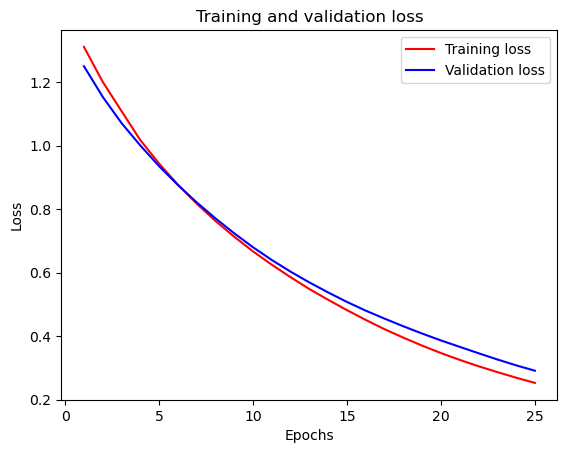

In [14]:
# Plot training history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

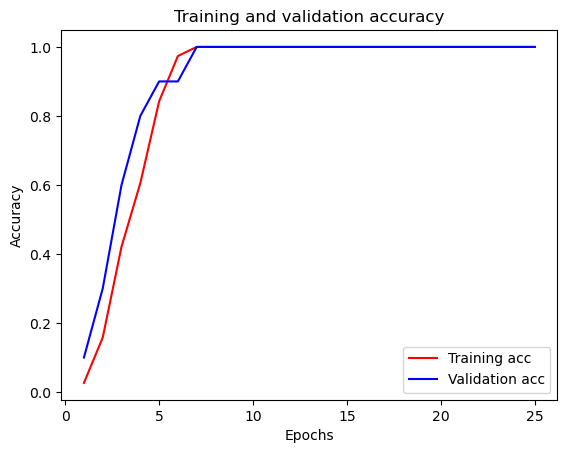

In [15]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Accuracy: {accuracy}')

1/1 [==============================] - 0s 50ms/step - loss: 0.3049 - accuracy: 1.0000
Accuracy: 1.0


In [ ]:
# Load the best model
model = load_model('best_model.h5')

# Get user input
def get_user_input():
    input_features = []
    feature_names = shuffled_df.columns[1:]  # Exclude the 'class' column
    for feature in feature_names:
        value = float(input(f"Enter value for {feature}: "))
        input_features.append(value)
    return np.array(input_features).reshape(1, -1)

user_input = get_user_input()
user_input_scaled = scaler.transform(user_input)

# Predict the class
predicted_class = model.predict(user_input_scaled)
predicted_class_index = np.argmax(predicted_class)

# Map class index to species name
species_names = {0: "Nymphaea rubra - Red Water Lily(Olu)",
                 1: "Nymphaea nouchali - Blue Water Lily(Nil manel)",
                 2: "Nymphoides ezannoi - Water Snowflake(kumudu)"}

# Print the predicted species name
print(f"Predicted class: {species_names.get(predicted_class_index, 'Unknown')}")

Enter value for Length :  4.5
Enter value for Width:  4.2
Enter value for Ratio:  1.02
